# Fluctuation of Volatility over time

S&P 500 values over time. Analyze fluctiations in Volatility. Visualize the Results.



## Lets get started with some theory about log Returns

https://investmentcache.com/magic-of-log-returns-concept-part-1/#:~:text=ln(1%2Br)%20is,P0%20to%20Pt.


## Task

1. Retrieve index level data from the Web
2. Calculate the annualized rolling standard deviation of the log returns (volatility)
3. Plot the indes level data and the volatility results

In [5]:
import numpy as np
import pandas as pd
from pylab import plt, mpl # import pyplot and mathplotlib packages

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


%matplotlib inline


%matplotlib is a magic function in IPython. I'll quote the relevant documentation here for you to read for convenience:

IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

%matplotlib inline sets the backend of matplotlib to the 'inline' backend:

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code. It may be worth also reading How to make IPython notebook matplotlib plot inline for reference on how to use it in your code.

If you want interactivity as well, you can use the nbagg backend with %matplotlib notebook (in IPython 3.x), as described here.

In [10]:
# pd.read_csv allows upload of locally or remotely stored files
data = pd.read_csv('D:/Python-for-Finance/Python-for-Finance-Repo-master/tr_eikon_eod_data.csv', index_col = 0, parse_dates=True)
data = pd.DataFrame(data['.SPX']) #create a dataframe out of a subset of data ('SPX' colums)
data.dropna(inplace=True) # permanently drop no data records
data.info() # metainformation about the dataset
                   


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    1972 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [11]:
data['rets'] = np.log(data / data.shift(1)) # performs log calculation in vectorized fashion
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252) #rolling annulaized volatility is calcuated (252 number of working days per year)


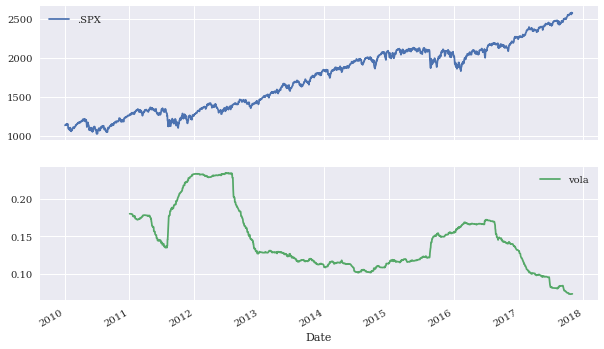

In [15]:
data[['.SPX','vola']].plot(subplots=True, figsize=(10,6));